# Estimation question: What’s the lowest dollar amount that nobody in the US made last year?

### "As in, nobody made exactly \$723,451. That kind of thing."

### "Hmm. I'm trying to explain to myself why nobody might've made just one cent."

My friend pointed out that there were 150 million dollar-cent amounts less than \$1.5 million, so the result would probably be quite low; even rounding to the nearest dollar probably wouldn't help much. So we also decided rounding to the nearest \$1000 might yield a more interesting answer. 

I'm using data from the American Community Survey, which reaches 3 million households a year and asks about income. I got the dataset from Professor Madeleine Udell as part of her class ORIE 4741 at Cornell University. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
url = 'https://people.orie.cornell.edu/mru8/orie4741/data/acs_2013.csv'
data = pd.read_csv(url)

In [3]:
data.columns

Index(['ACREHOUS', 'CLASSWKR', 'COMMUSE', 'COSTELEC', 'COSTGAS', 'COSTWATR',
       'EDUC', 'EMPSTAT', 'FOODSTMP', 'GRADEATT', 'HCOVANY', 'HHINCOME',
       'HHTYPE', 'LABFORCE', 'LOOKING', 'METRO', 'OWNERSHP', 'SCHOOL',
       'STATEICP', 'UHRSWORK', 'WKSWORK2'],
      dtype='object')

In [4]:
data['HHINCOME']
print(type(data['HHINCOME']))
data['HHINCOME']

<class 'pandas.core.series.Series'>


0          9999999.0
1           151000.0
2           151000.0
3           151000.0
4           151000.0
5            39930.0
6            11400.0
7            11400.0
8            11400.0
9             3900.0
10            5400.0
11          136000.0
12          136000.0
13           52600.0
14           52600.0
15          103000.0
16           81600.0
17           81600.0
18         9999999.0
19           26300.0
20           26300.0
21            7700.0
22           18000.0
23           18000.0
24           35000.0
25           35000.0
26           60000.0
27           60000.0
28           60000.0
29           60000.0
             ...    
3132765      45000.0
3132766      45000.0
3132767     135400.0
3132768     135400.0
3132769    9999999.0
3132770      12000.0
3132771      30000.0
3132772      30000.0
3132773      30000.0
3132774      30000.0
3132775      30000.0
3132776      63000.0
3132777      63000.0
3132778      63000.0
3132779      63000.0
3132780      63000.0
3132781      

In [5]:
# Are there any NA values?
print(pd.Series.any(data['HHINCOME'].isna()))

False


Frequencies of household income. There is an outlier at 1e7 that appears to be a placeholder value.


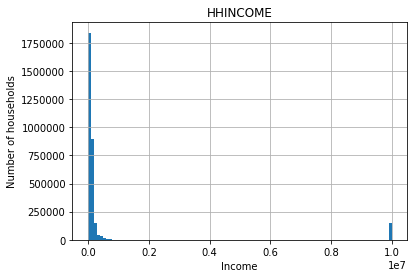

In [6]:
print("Frequencies of household income. There is an outlier at 1e7 that appears to be a placeholder value.")
pd.DataFrame.hist(data, column='HHINCOME', bins=100)
plt.xlabel('Income')
plt.ylabel('Number of households')
plt.show()

### After you get rid of the 9999999.0 values (placeholder for missing)

In [7]:
income_with_missing = data['HHINCOME']
income = income_with_missing[income_with_missing < 9999999].values
income

array([151000., 151000., 151000., ..., 110600., 110600., 110600.])

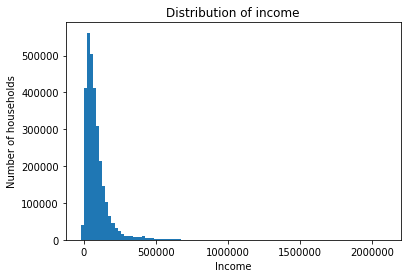

In [8]:
income_hist = plt.hist(income, bins=100)
plt.title('Distribution of income')
plt.xlabel('Income')
plt.ylabel('Number of households')
plt.show()

In [9]:
print("Maximum income: $%d"% np.max(income))
print("Minimum income: $%d"% np.min(income))
print("Mean income: $%d"% np.mean(income))
print("Median income: $%d"% np.median(income))
print("Number of unique income values: %d"% len(np.unique(income)))

Maximum income: $2090000
Minimum income: $-19770
Mean income: $85536
Median income: $63300
Number of unique income values: 32697


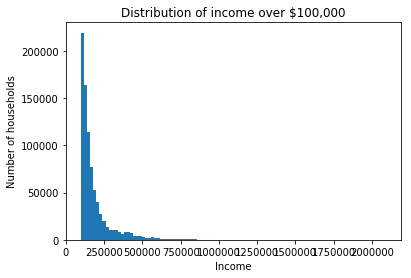

In [10]:
over_100k = income[income > 100000]
over_100k_hist = plt.hist(over_100k, bins=100)
plt.title('Distribution of income over $100,000')
plt.xlabel('Income')
plt.ylabel('Number of households')
plt.show()

In [11]:
unique_incomes = np.sort(np.unique(income))
print(unique_incomes[:100])

[-19770. -16800. -16400. -15000. -14600. -14000. -12400. -12180. -11600.
 -11400. -11200. -11100. -10970. -10700. -10500. -10400. -10000.  -9090.
  -9000.  -8800.  -8600.  -8400.  -8200.  -8100.  -7700.  -7200.  -7100.
  -7030.  -7000.  -6950.  -6800.  -6650.  -6600.  -6510.  -6500.  -6400.
  -6300.  -6200.  -6100.  -6000.  -5800.  -5720.  -5700.  -5650.  -5600.
  -5500.  -5400.  -5300.  -5250.  -5200.  -5100.  -5000.  -4920.  -4900.
  -4800.  -4796.  -4700.  -4600.  -4540.  -4500.  -4400.  -4310.  -4300.
  -4230.  -4200.  -4190.  -4100.  -4000.  -3950.  -3800.  -3750.  -3700.
  -3670.  -3600.  -3520.  -3500.  -3420.  -3400.  -3300.  -3200.  -3100.
  -3000.  -2900.  -2800.  -2700.  -2600.  -2500.  -2400.  -2390.  -2300.
  -2200.  -2100.  -2000.  -1900.  -1800.  -1700.  -1600.  -1500.  -1450.
  -1400.]


In [12]:
unique_positive_incomes = unique_incomes[unique_incomes > 0]
print(unique_positive_incomes[:100])
unique_incomes_over_1k = unique_incomes[unique_incomes > 1000]
print(unique_incomes_over_1k[:100])

[  1.   2.   4.   5.   6.   8.  10.  11.  12.  13.  20.  21.  30.  40.
  50.  51.  60.  61.  64.  70.  80.  84.  90.  91. 100. 101. 104. 110.
 120. 121. 124. 130. 140. 144. 150. 160. 170. 180. 190. 198. 200. 204.
 210. 220. 230. 235. 240. 250. 260. 270. 272. 280. 290. 300. 301. 310.
 320. 330. 340. 350. 360. 370. 380. 390. 400. 401. 410. 420. 430. 431.
 440. 450. 460. 470. 480. 490. 500. 501. 504. 510. 520. 530. 540. 550.
 551. 552. 560. 564. 570. 571. 580. 590. 600. 605. 610. 614. 620. 630.
 640. 641.]
[1001. 1003. 1004. 1010. 1020. 1024. 1030. 1040. 1050. 1060. 1070. 1080.
 1090. 1100. 1101. 1110. 1120. 1130. 1140. 1150. 1160. 1170. 1180. 1190.
 1200. 1201. 1202. 1204. 1210. 1220. 1230. 1240. 1250. 1260. 1270. 1280.
 1290. 1300. 1301. 1304. 1310. 1320. 1330. 1340. 1350. 1360. 1370. 1380.
 1390. 1400. 1401. 1404. 1410. 1420. 1430. 1434. 1440. 1450. 1460. 1470.
 1480. 1490. 1500. 1501. 1502. 1510. 1520. 1530. 1540. 1550. 1560. 1570.
 1580. 1590. 1600. 1601. 1604. 1610. 1620. 1630. 1640

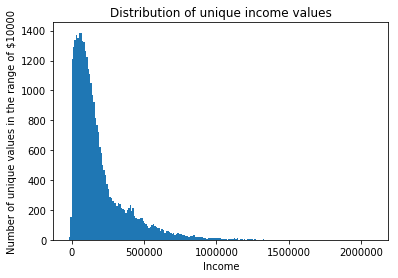

In [13]:
#Histogram of unique incomes
unique_income_hist = plt.hist(unique_incomes, 
                              bins=np.arange(
                                  start = np.min(unique_incomes), stop = np.max(unique_incomes), step=10000))
plt.title('Distribution of unique income values')
plt.xlabel('Income')
plt.ylabel('Number of unique values in the range of $10000')
plt.show()

The lowest positive income that nobody reported is \$3. The lowest income over \$1000 that nobody reported is $1002.

## Lowest empty 1000 (rounded and range)

In [14]:
unique_positive_thousand = np.unique((unique_positive_incomes/1000).astype(int))
print(unique_positive_thousand[:100])

for i in range(1000):
    if i not in unique_positive_thousand:
        print("Nobody made between $%d and $%d, inclusive"%(i*1000, (i+1)*1000 - 1))
        break

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Nobody made between $758000 and $758999, inclusive


In [15]:
for i in range(1, len(unique_positive_incomes)):
    if unique_positive_incomes[i] - unique_positive_incomes[i-1] >= 1000:
        print("First gap of at least $1000: %d to %d"%(unique_positive_incomes[i-1], unique_positive_incomes[i]))
        break
        
for i in range(1, len(unique_positive_incomes)):
    if unique_positive_incomes[i] - unique_positive_incomes[i-1] > 1000:
        print("First gap of more than $1000: %d to %d"%(unique_positive_incomes[i-1], unique_positive_incomes[i]))
        break

First gap of at least $1000: 689000 to 690000
First gap of more than $1000: 757630 to 759000


## The opposite: longest run of consecutive income values

In [16]:
non_values = np.array(range(int(np.max(income))))
non_values = np.setdiff1d(non_values, unique_positive_incomes)

max_index = 1

for i in range(1, len(non_values)):
    if (non_values[i] - non_values[i-1]) > (non_values[max_index] - non_values[max_index - 1]):
        max_index = i
        
# print(max_index)
# print(non_values[max_index])
# print(non_values[max_index-1])
# print(non_values[max_index] - non_values[max_index-1])
print("The longest run of consecutive dollar amounts reported is a run of length %d from $%d to $%d"
      %(non_values[max_index] - non_values[max_index-1] - 1,
        non_values[max_index-1] + 1,
        non_values[max_index] - 1))
print("The unique income values near that run:")
index_of_start = np.argwhere(unique_positive_incomes == non_values[max_index-1] + 1).flatten()[0]
print(unique_positive_incomes[index_of_start - 10 : index_of_start + 10])
print("The income values (non-unique) near that run:")
index_of_start_all = np.argwhere(sorted(income) == non_values[max_index-1] + 1).flatten()[0]
print(sorted(income)[index_of_start_all - 10 : index_of_start_all + 10])

The longest run of consecutive dollar amounts reported is a run of length 6 from $125000 to $125005
The unique income values near that run:
[124904. 124910. 124920. 124930. 124940. 124950. 124960. 124970. 124980.
 124990. 125000. 125001. 125002. 125003. 125004. 125005. 125008. 125010.
 125014. 125020.]
The income values (non-unique) near that run:
[124980.0, 124990.0, 124990.0, 124990.0, 124990.0, 124990.0, 124990.0, 124990.0, 124990.0, 124990.0, 125000.0, 125000.0, 125000.0, 125000.0, 125000.0, 125000.0, 125000.0, 125000.0, 125000.0, 125000.0]


This seemed pretty high. Taking a look at arbitrary sections of the list of unique incomes seemed to show that most people rounded their incomes to the nearest 10 dollars (or more), either in how they reported their income or how much they actually received. 

In [17]:
print(unique_positive_incomes[2000:2020])
print(unique_positive_incomes[5000:5020])
print(unique_positive_incomes[10000:10020])

[16010. 16012. 16020. 16030. 16040. 16050. 16060. 16070. 16080. 16090.
 16100. 16101. 16104. 16110. 16120. 16130. 16140. 16150. 16160. 16170.]
[38360. 38370. 38380. 38390. 38400. 38401. 38402. 38404. 38408. 38410.
 38420. 38430. 38434. 38440. 38450. 38451. 38454. 38460. 38470. 38480.]
[74980. 74990. 75000. 75001. 75004. 75005. 75008. 75009. 75010. 75014.
 75020. 75030. 75034. 75038. 75040. 75050. 75060. 75064. 75070. 75080.]


The distribution of the last digit of the unique incomes
For some reason, the second most common last digit after 0 is 4


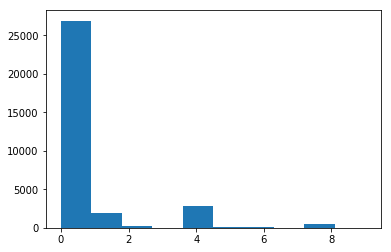

In [18]:
print("The distribution of the last digit of the unique incomes")
print("For some reason, the second most common last digit after 0 is 4")
unique_mod_10_hist = plt.hist(unique_positive_incomes % 10)

The distribution of the last digit of all incomes, including duplicates
Using a log scale because 0 is too high otherwise
4 remains the second most common last digit


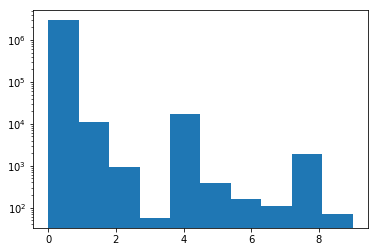

In [19]:
print("The distribution of the last digit of all incomes, including duplicates")
print("Using a log scale because 0 is too high otherwise")
print("4 remains the second most common last digit")
all_mod_10_hist = plt.hist(income % 10, log = True)